In [1]:
from __future__ import division
import sys
import random
import copy
import math
import json

import numpy as np
import pandas as pd
import scipy

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl

import seaborn as sns

sys.path.append("../resources/")
import sct_py3

sns.set_style("ticks")
sns.set_context("talk")

output_dir = "out/"
output_suffix = ""
output_formats = [".png", ".pdf"]

def save_figure(fig, name):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format)
    return None

mpl.rc('savefig', dpi=300)

pd.options.mode.chained_assignment = None  # default='warn'

/Users/colleenmclaughlin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# adult transcriptomic comparison

In [2]:
df = pd.read_csv('../data/htseq_ORN_nuclei_LogCPM_17plates_addintron_hq50k_neuron2-5.tab.gz',  sep="\t", header=0, index_col=0)

df_libs_all = pd.read_csv('../data/PN_ORN_libs_CNM.csv', sep=",", header=0, index_col=0)

df.shape

(17472, 2829)

In [3]:
names_ORNs = []
with open ("../resources/names_ORN_hq_24h_adult_lamGFP_noAN.txt") as f:
    for line in f:
        names_ORNs.append(line.rstrip())

In [4]:
# Get names of adult ORNs
selector7 = (df_libs_all["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P1") 
selector8 = (df_libs_all["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P2") 
selector9 = (df_libs_all["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P3") 
selector10 = (df_libs_all["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P5") 
selector11 = (df_libs_all["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P6") 
selector12 = (df_libs_all["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P7") 
selector13 = (df_libs_all["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P8") 
selector14 = (df_libs_all["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P9") 
selector15 = (df_libs_all["genotype"] == "ORNnuclei_adult_nSybUNC84GFP_P10") 
selector16 = (df_libs_all['genotype'] == "ORNnuclei_adult_nSybLam_P2")
selector17 = (df_libs_all['genotype'] == "ORNnuclei_adult_nSybLam_P3")

ORNs_adult = [x for x in list(df.columns) if ((x in df_libs_all.loc[selector7].index) 
                      or (x in df_libs_all.loc[selector8].index) 
                      or (x in df_libs_all.loc[selector9].index)
                      or (x in df_libs_all.loc[selector10].index)
                      or (x in df_libs_all.loc[selector11].index)
                      or (x in df_libs_all.loc[selector12].index)
                      or (x in df_libs_all.loc[selector13].index)
                      or (x in df_libs_all.loc[selector14].index)
                      or (x in df_libs_all.loc[selector15].index)
                      or (x in df_libs_all.loc[selector16].index)
                      or (x in df_libs_all.loc[selector17].index))
                      and  x in names_ORNs]

print('adult ORNs:'), len(ORNs_adult)

adult ORNs:


(None, 1891)

In [5]:
df_adult = df[list(ORNs_adult)]


print ("ORN_adult:"), df_adult.shape

ORN_adult:


(None, (17472, 1891))

In [6]:
#open all cell names within each cluster

#LB

cluster_1 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_0_V.txt') as f:
    for line in f:
        cluster_1.append(line.rstrip())
len(cluster_1)

cluster_2 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_1_DM4.txt') as f:
    for line in f:
        cluster_2.append(line.rstrip())
len(cluster_2)

cluster_3 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_2_DM2.txt') as f:
    for line in f:
        cluster_3.append(line.rstrip())
len(cluster_3)

cluster_4 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_14_DM1.txt') as f:
    for line in f:
        cluster_4.append(line.rstrip())
len(cluster_4)

cluster_5 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_15_VA2.txt') as f:
    for line in f:
        cluster_5.append(line.rstrip())
len(cluster_1),len(cluster_2),len(cluster_3), len(cluster_4),len(cluster_5)

(79, 86, 78, 169, 51)

In [7]:
#TSB

cluster_6 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_3_DC2.txt') as f:
    for line in f:
        cluster_6.append(line.rstrip())


cluster_7 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_10_D.txt') as f:
    for line in f:
        cluster_7.append(line.rstrip())


cluster_8 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_11_VM3.txt') as f:
    for line in f:
        cluster_8.append(line.rstrip())


cluster_9 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_26_DL5.txt') as f:
    for line in f:
        cluster_9.append(line.rstrip())
        
        
len(cluster_6),len(cluster_7),len(cluster_8), len(cluster_9),

(51, 36, 53, 48)

In [8]:
#AT

cluster_10 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_4_VA1v.txt') as f:
    for line in f:
        cluster_10.append(line.rstrip())
                          
cluster_11 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_5_DA1.txt') as f:
    for line in f:
        cluster_11.append(line.rstrip())
                          
cluster_12 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_16_DL3.txt') as f:
    for line in f:
        cluster_12.append(line.rstrip())

cluster_13 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_17_VA1d.txt') as f:
    for line in f:
        cluster_13.append(line.rstrip())
        
cluster_19 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_7_DC1.txt') as f:
    for line in f:
        cluster_19.append(line.rstrip())
                          
len(cluster_10),len(cluster_11),len(cluster_12), len(cluster_13), len(cluster_19)

(90, 119, 14, 14, 118)

In [9]:
#sac

cluster_14 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_6_VP1l.txt') as f:
    for line in f:
        cluster_14.append(line.rstrip())
                          
cluster_15 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_13_DP1m_DC4.txt') as f:
    for line in f:
        cluster_15.append(line.rstrip())
                          
                          
cluster_16 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_18_VP4_VP1d.txt') as f:
    for line in f:
        cluster_16.append(line.rstrip())
                          
len(cluster_14),len(cluster_15),len(cluster_16),

(26, 69, 28)

In [10]:
#AC

cluster_17 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_12_DL2dv_DP1l.txt') as f:
    for line in f:
        cluster_17.append(line.rstrip())
                          
                          
cluster_18 = []
with open ('../data/Figure7/adult/cell_names/names_cluster_19_VL1_VM1.txt') as f:
    for line in f:
        cluster_18.append(line.rstrip())
                          
len(cluster_17),len(cluster_18)

(101, 31)

In [11]:
adult_ORNs = list(cluster_1 + cluster_2 +cluster_3 + cluster_4 + cluster_5 + cluster_6 + cluster_7 + cluster_8 + cluster_9 +cluster_10 + cluster_11 +cluster_12 +cluster_13 + cluster_19
+ cluster_14 + cluster_15 + cluster_16 +cluster_17 + cluster_18)

In [12]:
df_5types = df_adult[adult_ORNs]

df_5types.shape

(17472, 1261)

In [13]:
a = 0
for i in range(1,19):
    names1 = []
    with open("../data/Figure7/adult/clusters_renamed/names_cluster_" + str(i) +".txt") as f:
        for line in f:
            names1.append(line.rstrip())
    for j in range(i+1,20):
            names2 = []
            with open("../data/Figure7/adult/clusters_renamed/names_cluster_" +str(j)+".txt") as f:
                for line in f:
                    names2.append(line.rstrip())
          
            df_DE = sct_py3.calc_DE_mannwhitneyu(df_5types, list(names1), list(names2))
            df_DE.to_csv("../data/Figure7/adult/comparisons/dfs/df_DE_cluster_" + str(i) +"_" +str(j) + ".csv")
            print ("df_DE_type_" + str(i) +"_" +str(j) + " is done!")
            a += 1
print ("all done!")
print ("total pairs:"),a

df_DE_type_1_2 is done!
df_DE_type_1_3 is done!
df_DE_type_1_4 is done!
df_DE_type_1_5 is done!
df_DE_type_1_6 is done!
df_DE_type_1_7 is done!
df_DE_type_1_8 is done!
df_DE_type_1_9 is done!
df_DE_type_1_10 is done!
df_DE_type_1_11 is done!
df_DE_type_1_12 is done!
df_DE_type_1_13 is done!
df_DE_type_1_14 is done!
df_DE_type_1_15 is done!
df_DE_type_1_16 is done!
df_DE_type_1_17 is done!
df_DE_type_1_18 is done!
df_DE_type_1_19 is done!
df_DE_type_2_3 is done!
df_DE_type_2_4 is done!
df_DE_type_2_5 is done!
df_DE_type_2_6 is done!
df_DE_type_2_7 is done!
df_DE_type_2_8 is done!
df_DE_type_2_9 is done!
df_DE_type_2_10 is done!
df_DE_type_2_11 is done!
df_DE_type_2_12 is done!
df_DE_type_2_13 is done!
df_DE_type_2_14 is done!
df_DE_type_2_15 is done!
df_DE_type_2_16 is done!
df_DE_type_2_17 is done!
df_DE_type_2_18 is done!
df_DE_type_2_19 is done!
df_DE_type_3_4 is done!
df_DE_type_3_5 is done!
df_DE_type_3_6 is done!
df_DE_type_3_7 is done!
df_DE_type_3_8 is done!
df_DE_type_3_9 is do

(None, 171)

In [14]:
df1_adult= df_adult[cluster_1]
df2_adult= df_adult[cluster_2]
df3_adult= df_adult[cluster_3]
df4_adult= df_adult[cluster_4]
df5_adult= df_adult[cluster_5]
df6_adult= df_adult[cluster_6]
df7_adult= df_adult[cluster_7]
df8_adult= df_adult[cluster_8]
df9_adult= df_adult[cluster_9]
df10_adult= df_adult[cluster_10]
df11_adult= df_adult[cluster_11]
df12_adult= df_adult[cluster_12]
df13_adult= df_adult[cluster_13]
df14_adult= df_adult[cluster_14]
df15_adult= df_adult[cluster_15]
df16_adult= df_adult[cluster_16]
df17_adult= df_adult[cluster_17]
df18_adult= df_adult[cluster_18]
df19_adult= df_adult[cluster_19]

In [15]:
df1_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_1.csv')
df_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_2.csv')
df3_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_3.csv')
df4_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_4.csv')
df5_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_5.csv')
df6_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_6.csv')
df7_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_7.csv')
df8_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_8.csv')
df9_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_9.csv')
df10_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_10.csv')
df11_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_11.csv')
df12_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_12.csv')
df13_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_13.csv')
df14_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_14.csv')
df15_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_15.csv')
df16_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_16.csv')
df17_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_17.csv')
df18_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_18.csv')
df19_adult.to_csv('../data/Figure7/adult/cell_names/test/df_test_19.csv')

In [16]:
df1_adult['V'] = df1_adult.mean(numeric_only=True, axis=1)
df1_adult['DM4'] = df2_adult.mean(numeric_only=True, axis=1)
df1_adult['DM2'] = df3_adult.mean(numeric_only=True, axis=1)
df1_adult['DM1'] = df4_adult.mean(numeric_only=True, axis=1)
df1_adult['VA2'] = df5_adult.mean(numeric_only=True, axis=1)
df1_adult['DC2'] = df6_adult.mean(numeric_only=True, axis=1)
df1_adult['D'] = df7_adult.mean(numeric_only=True, axis=1)
df1_adult['VM3_VA5'] = df8_adult.mean(numeric_only=True, axis=1)
df1_adult['DL5'] = df9_adult.mean(numeric_only=True, axis=1)
df1_adult['VA1v'] = df10_adult.mean(numeric_only=True, axis=1)
df1_adult['DA1'] = df11_adult.mean(numeric_only=True, axis=1)
df1_adult['DL3'] = df12_adult.mean(numeric_only=True, axis=1)
df1_adult['VA1d'] = df13_adult.mean(numeric_only=True, axis=1)
df1_adult['VP1l_VP3'] = df14_adult.mean(numeric_only=True, axis=1)
df1_adult['DP1m_DC4'] = df15_adult.mean(numeric_only=True, axis=1)
df1_adult['VP4_VP1d_VP2'] = df16_adult.mean(numeric_only=True, axis=1)
df1_adult['DL2d/v_DP1l_VC3l'] = df17_adult.mean(numeric_only=True, axis=1)
df1_adult['VL1_VM1'] = df18_adult.mean(numeric_only=True, axis=1)
df1_adult['DC1'] = df19_adult.mean(numeric_only=True, axis=1)

In [17]:
df1_adult.head()

,ORNnuclei_adult_nSybUNC84GFP_P1_C15,ORNnuclei_adult_nSybUNC84GFP_P1_G3,ORNnuclei_adult_nSybUNC84GFP_P1_J20,ORNnuclei_adult_nSybUNC84GFP_P1_M11,ORNnuclei_adult_nSybUNC84GFP_P1_N8,ORNnuclei_adult_nSybUNC84GFP_P2_F24,ORNnuclei_adult_nSybUNC84GFP_P2_H6,ORNnuclei_adult_nSybUNC84GFP_P2_K1,ORNnuclei_adult_nSybUNC84GFP_P2_N13,ORNnuclei_adult_nSybUNC84GFP_P3_A13,...,VA1v,DA1,DL3,VA1d,VP1l_VP3,DP1m_DC4,VP4_VP1d_VP2,DL2d/v_DP1l_VC3l,VL1_VM1,DC1
symbol,,,,,,,,,,,,,,,,,,,,,
7SLRNA:CR32864,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.026656,0.096339,0.000000,0.166449,0.150820,0.079953,0.060310,0.034075,0.000000,0.105654
a,1.466188,0.000000,0.000000,0.0,0.0,8.275463,0.000000,0.0,0.0,0.000000,...,0.149792,0.047719,0.000000,0.078290,0.167464,0.440543,0.936989,0.242909,0.000000,0.204658
abd-A,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.035382,0.047997,0.000000,0.000000,0.329694,0.079591,0.032757,0.064605,0.029860,0.000000
Abd-B,1.121197,0.000000,1.359722,0.0,0.0,0.000000,0.000000,0.0,0.0,0.766058,...,0.077030,0.135865,0.000000,0.075206,0.462098,0.188350,0.070333,0.116539,0.000000,0.075990
Abl,0.666881,1.077895,0.000000,0.0,0.0,6.544100,9.595221,0.0,0.0,0.000000,...,3.924847,4.342313,3.132601,2.301456,3.650952,2.675434,2.995844,2.589105,1.324317,2.920107


In [18]:
df1_adult.iloc[:,79:99 ]

,V,DM4,DM2,DM1,VA2,DC2,D,VM3_VA5,DL5,VA1v,DA1,DL3,VA1d,VP1l_VP3,DP1m_DC4,VP4_VP1d_VP2,DL2d/v_DP1l_VC3l,VL1_VM1,DC1
symbol,,,,,,,,,,,,,,,,,,,
7SLRNA:CR32864,0.080903,0.164576,0.022138,0.078382,0.209259,0.130230,0.056826,0.099734,0.000000,0.026656,0.096339,0.000000,0.166449,0.150820,0.079953,0.060310,0.034075,0.000000,0.105654
a,0.652773,0.349273,0.117272,0.141982,0.007297,0.037395,0.092903,0.000000,0.032940,0.149792,0.047719,0.000000,0.078290,0.167464,0.440543,0.936989,0.242909,0.000000,0.204658
abd-A,0.000000,0.005909,0.014845,0.051770,0.000000,0.000000,0.000000,0.000000,0.000000,0.035382,0.047997,0.000000,0.000000,0.329694,0.079591,0.032757,0.064605,0.029860,0.000000
Abd-B,0.041101,0.066526,0.044399,0.155894,0.000000,0.153103,0.243124,0.063136,0.000000,0.077030,0.135865,0.000000,0.075206,0.462098,0.188350,0.070333,0.116539,0.000000,0.075990
Abl,3.084114,2.909267,2.170134,3.032887,2.893705,2.812580,3.581216,3.761628,2.850519,3.924847,4.342313,3.132601,2.301456,3.650952,2.675434,2.995844,2.589105,1.324317,2.920107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tlk,6.840757,5.845755,6.442519,5.561841,6.370619,5.970266,5.824016,5.681613,6.292101,4.667305,4.196278,5.116446,4.982084,5.430837,6.949004,5.483578,6.059360,4.278812,5.753881
muc,1.856234,1.063505,0.809942,1.259844,1.554417,1.499180,1.451305,1.134358,1.931717,1.882320,2.017165,1.466273,0.828166,0.900067,2.004119,1.947074,2.153133,0.809178,1.576443
THG,0.000000,0.086053,0.093869,0.061251,0.000000,0.000000,0.250549,0.065103,0.000000,0.211224,0.107842,0.000000,0.000000,0.000000,0.000000,0.000000,0.114694,0.000000,0.121704


In [19]:
df_mean_adult = df1_adult.iloc[:,79:99 ]

In [20]:
df_mean_adult.to_csv('../data/Figure7/adult/df_mean_19clusters_adult.csv')

In [21]:
df_lib_adult = pd.read_csv('../data/Figure7/adult/libs_19clusters_adult.csv', sep=",", header=0, index_col=0)

In [22]:
# Obtain DE genes from all comparisons and remove duplicate genes. 

DE_genes_combined_adult = []
P_threshold = 0.05
print ("P ="), P_threshold

for i in range(1,19):
    for j in range(i+1,20):
        df_DE_cluster = pd.read_csv("../data/Figure7/adult/comparisons/dfs/df_DE_cluster_" + str(i) +"_" +str(j) + ".csv", sep=",", header=0, index_col=0)
        DE_genes_adult = df_DE_cluster[df_DE_cluster["pvalue_adj"]< P_threshold].index
        print (("DE_genes_type_"+ str(i) + "_" +str(j)),len(DE_genes_adult),len(DE_genes_combined_adult))
        DE_genes_combined_adult = list(DE_genes_combined_adult) + list(DE_genes_adult)

DE_genes_combined_remove_dup_adult = list(set(DE_genes_combined_adult))
print ("after romoving duplicates"), len(DE_genes_combined_remove_dup_adult),len(DE_genes_combined_adult)


P =
DE_genes_type_1_2 156 0
DE_genes_type_1_3 158 156
DE_genes_type_1_4 191 314
DE_genes_type_1_5 107 505
DE_genes_type_1_6 125 612
DE_genes_type_1_7 116 737
DE_genes_type_1_8 122 853
DE_genes_type_1_9 125 975
DE_genes_type_1_10 221 1100
DE_genes_type_1_11 267 1321
DE_genes_type_1_12 53 1588
DE_genes_type_1_13 60 1641
DE_genes_type_1_14 68 1701
DE_genes_type_1_15 115 1769
DE_genes_type_1_16 57 1884
DE_genes_type_1_17 150 1941
DE_genes_type_1_18 91 2091
DE_genes_type_1_19 210 2182
DE_genes_type_2_3 23 2392
DE_genes_type_2_4 40 2415
DE_genes_type_2_5 18 2455
DE_genes_type_2_6 53 2473
DE_genes_type_2_7 35 2526
DE_genes_type_2_8 20 2561
DE_genes_type_2_9 25 2581
DE_genes_type_2_10 134 2606
DE_genes_type_2_11 161 2740
DE_genes_type_2_12 31 2901
DE_genes_type_2_13 26 2932
DE_genes_type_2_14 65 2958
DE_genes_type_2_15 112 3023
DE_genes_type_2_16 60 3135
DE_genes_type_2_17 155 3195
DE_genes_type_2_18 82 3350
DE_genes_type_2_19 91 3432
DE_genes_type_3_4 30 3523
DE_genes_type_3_5 31 3553
DE_gene

(None, 936, 11914)

In [23]:
with open('../data/Figure7/adult/DE_genes_936_adult.txt', 'w') as filehandle:
    for listitem in DE_genes_combined_remove_dup_adult:
        filehandle.write('%s\n' % listitem)

In [24]:
Z2=df_mean_adult.loc[DE_genes_combined_remove_dup_adult]
Z2.shape

(936, 19)

#the original dendrogram in Figure 7 was generated in an earlier version of python and using an earlier version of seaborn using these EXACT settings; this dendrogram below looks different but the conclusions are the same as in the dendrogram in the figure

Text(172.97816639072846, 0.5, 'Gene')

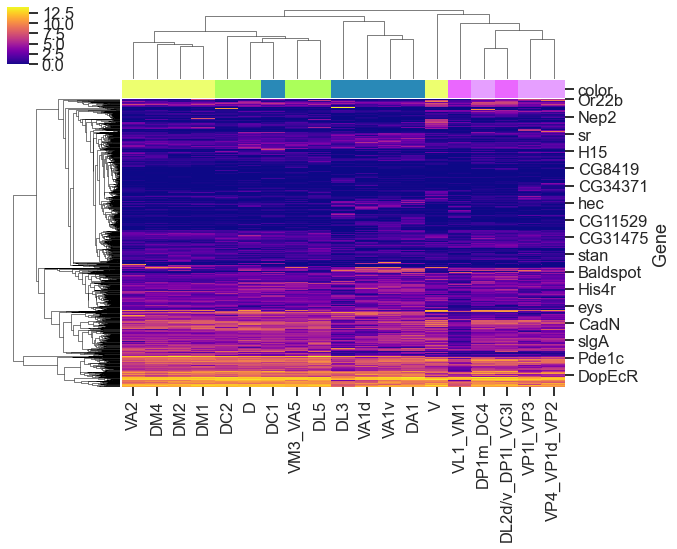

In [25]:
#use clustermap to generate dendrogram of adult transcriptomes

col_colors = df_lib_adult.loc[Z2.columns]["color"]

cm = sns.clustermap(Z2, method="weighted", cmap="plasma", figsize=(10,7), row_cluster=True, col_cluster=True, 
                    col_colors=col_colors)

plt.setp(cm.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

cm.ax_heatmap.set_ylabel("Gene")



# 24h APF transcriptomic comparison

In [26]:
df_ORN_24h = pd.read_csv('../data/htseq_ORN_cell_LogCPM_10plates_hq50k_neuron2-5.tab.gz', sep="\t", header=0, index_col=0)

In [27]:
names_hq_ORNs = []
with open("../resources/names_hq_24hORNs_acj6pos.txt") as f:
    for line in f:
           names_hq_ORNs.append(line.rstrip())
print ("24h_ORNs_minus_acj6"), len(names_hq_ORNs)

24h_ORNs_minus_acj6


(None, 986)

In [28]:
# Get names of 24h ORNs
selector0 = (df_libs_all["label"] == "Elav_24h_ORN_P1") 
selector1 = (df_libs_all["label"] == "Elav_24h_ORN_P2")
selector2 = (df_libs_all["label"] == "Elav_24h_ORN_P3")
selector3 = (df_libs_all["label"] == "Elav_24h_ORN_P4")
selector4 = (df_libs_all["label"] == "Elav_24h_ORN_P5")
selector5 = (df_libs_all["label"] == "Elav_24h_ORN_P6")
selector6 = (df_libs_all["label"] == "Elav_24h_ORN_P7")
ORNs_24h = [x for x in list(df_ORN_24h.columns) if ((x in df_libs_all.loc[selector0].index) 
                      or (x in df_libs_all.loc[selector1].index) 
                      or (x in df_libs_all.loc[selector2].index)
                      or (x in df_libs_all.loc[selector3].index)
                      or (x in df_libs_all.loc[selector4].index)
                      or (x in df_libs_all.loc[selector5].index)
                      or (x in df_libs_all.loc[selector6].index))
                      and x in names_hq_ORNs]
print ("Elav_ORN_24h:"), len(ORNs_24h)

Elav_ORN_24h:


(None, 986)

In [29]:
df  = df_ORN_24h[list(ORNs_24h)]
df.shape

(17472, 986)

In [30]:
#load cell names 

#LB
cluster_2 = []
with open ('../data/Figure7/24h/cell_names/Cluster_2.txt') as f:
    for line in f:
        cluster_2.append(line.rstrip())
len(cluster_2)

cluster_3 = []
with open ('../data/Figure7/24h/cell_names/Cluster_3.txt') as f:
    for line in f:
        cluster_3.append(line.rstrip())
len(cluster_3)

cluster_8 = []
with open ('../data/Figure7/24h/cell_names/Cluster_8.txt') as f:
    for line in f:
        cluster_8.append(line.rstrip())
len(cluster_8)

cluster_11 = []
with open ('../data/Figure7/24h/cell_names/Cluster_11.txt') as f:
    for line in f:
        cluster_11.append(line.rstrip())
len(cluster_11)

cluster_20 = []
with open ('../data/Figure7/24h/cell_names/Cluster_20.txt') as f:
    for line in f:
        cluster_20.append(line.rstrip())
        
len(cluster_2),len(cluster_3),len(cluster_8), len(cluster_11),len(cluster_20)

(29, 23, 25, 40, 22)

In [31]:
#TSB

cluster_7 = []
with open ('../data/Figure7/24h/cell_names/Cluster_7.txt') as f:
    for line in f:
        cluster_7.append(line.rstrip())
len(cluster_7)

cluster_16 = []
with open ('../data/Figure7/24h/cell_names/Cluster_16.txt') as f:
    for line in f:
        cluster_16.append(line.rstrip())
len(cluster_16)

cluster_17 = []
with open ('../data/Figure7/24h/cell_names/Cluster_17.txt') as f:
    for line in f:
        cluster_17.append(line.rstrip())
len(cluster_17)

cluster_19 = []
with open ('../data/Figure7/24h/cell_names/Cluster_19.txt') as f:
    for line in f:
        cluster_19.append(line.rstrip())
len(cluster_19)


len(cluster_7),len(cluster_16),len(cluster_17), len(cluster_19),

(26, 38, 10, 15)

In [32]:
#AT

cluster_1 = []
with open ('../data/Figure7/24h/cell_names/Cluster_1.txt') as f:
    for line in f:
        cluster_1.append(line.rstrip())
len(cluster_1)

cluster_4 = []
with open ('../data/Figure7/24h/cell_names/Cluster_4.txt') as f:
    for line in f:
        cluster_4.append(line.rstrip())
len(cluster_4)

cluster_5 = []
with open ('../data/Figure7/24h/cell_names/Cluster_5.txt') as f:
    for line in f:
        cluster_5.append(line.rstrip())
len(cluster_5)

cluster_12 = []
with open ('../data/Figure7/24h/cell_names/Cluster_12.txt') as f:
    for line in f:
        cluster_12.append(line.rstrip())
len(cluster_12)

cluster_13 = []
with open ('../data/Figure7/24h/cell_names/Cluster_13.txt') as f:
    for line in f:
        cluster_13.append(line.rstrip())
len(cluster_13)

cluster_18 = []
with open ('../data/Figure7/24h/cell_names/Cluster_18.txt') as f:
    for line in f:
        cluster_18.append(line.rstrip())
len(cluster_18)

len(cluster_1),len(cluster_4),len(cluster_5), len(cluster_12),len(cluster_13), len(cluster_18),

(26, 19, 29, 27, 22, 29)

In [33]:
#AC


cluster_6 = []
with open ('../data/Figure7/24h/cell_names/Cluster_6.txt') as f:
    for line in f:
        cluster_6.append(line.rstrip())
len(cluster_6)

cluster_9 = []
with open ('../data//Figure7/24h/cell_names/Cluster_9.txt') as f:
    for line in f:
        cluster_9.append(line.rstrip())
len(cluster_9)

cluster_10 = []
with open ('../data/Figure7/24h/cell_names/Cluster_10.txt') as f:
    for line in f:
        cluster_10.append(line.rstrip())
len(cluster_10)

cluster_14 = []
with open ('../data/Figure7/24h/cell_names/Cluster_14.txt') as f:
    for line in f:
        cluster_14.append(line.rstrip())
len(cluster_14)

cluster_15 = []
with open ('../data/Figure7/24h/cell_names/Cluster_15.txt') as f:
    for line in f:
        cluster_15.append(line.rstrip())
len(cluster_15)


len(cluster_6),len(cluster_9),len(cluster_10), len(cluster_14),len(cluster_15),

(38, 29, 26, 22, 37)

In [34]:
ORNs_24h = list(cluster_1 + cluster_2 +cluster_3 + cluster_4 + cluster_5 + cluster_6 + cluster_7 + cluster_8 + cluster_9 +cluster_10 + cluster_11 +cluster_12 +cluster_13 + cluster_19
+ cluster_14 + cluster_15 + cluster_16 +cluster_17 + cluster_18+ cluster_20)

df_24_4types = df[ORNs_24h]

df_24_4types.shape

(17472, 532)

In [35]:
a = 0
for i in range(1,20):
    names1 = []
    with open("../data/Figure7/24h/cell_names/Cluster_" + str(i) +".txt") as f:
        for line in f:
            names1.append(line.rstrip())
    for j in range(i+1,21):
            names2 = []
            with open("../data/Figure7/24h/cell_names/Cluster_"  +str(j)+".txt") as f:
                for line in f:
                    names2.append(line.rstrip())
         
            df_DE = sct_py3.calc_DE_mannwhitneyu(df_24_4types, list(names1), list(names2))
            df_DE.to_csv("../data/Figure7/24h/lineage/dfs/df_DE_cluster_" + str(i) +"_" +str(j) + ".csv")
            print ("df_DE_type_" + str(i) +"_" +str(j) + " is done!")
            a += 1
print ("all done!")
print ("total pairs:",a)

df_DE_type_1_2 is done!
df_DE_type_1_3 is done!
df_DE_type_1_4 is done!
df_DE_type_1_5 is done!
df_DE_type_1_6 is done!
df_DE_type_1_7 is done!
df_DE_type_1_8 is done!
df_DE_type_1_9 is done!
df_DE_type_1_10 is done!
df_DE_type_1_11 is done!
df_DE_type_1_12 is done!
df_DE_type_1_13 is done!
df_DE_type_1_14 is done!
df_DE_type_1_15 is done!
df_DE_type_1_16 is done!
df_DE_type_1_17 is done!
df_DE_type_1_18 is done!
df_DE_type_1_19 is done!
df_DE_type_1_20 is done!
df_DE_type_2_3 is done!
df_DE_type_2_4 is done!
df_DE_type_2_5 is done!
df_DE_type_2_6 is done!
df_DE_type_2_7 is done!
df_DE_type_2_8 is done!
df_DE_type_2_9 is done!
df_DE_type_2_10 is done!
df_DE_type_2_11 is done!
df_DE_type_2_12 is done!
df_DE_type_2_13 is done!
df_DE_type_2_14 is done!
df_DE_type_2_15 is done!
df_DE_type_2_16 is done!
df_DE_type_2_17 is done!
df_DE_type_2_18 is done!
df_DE_type_2_19 is done!
df_DE_type_2_20 is done!
df_DE_type_3_4 is done!
df_DE_type_3_5 is done!
df_DE_type_3_6 is done!
df_DE_type_3_7 is 

In [36]:
df1_24= df[cluster_1]
df2_24= df[cluster_2]
df3_24= df[cluster_3]
df4_24= df[cluster_4]
df5_24= df[cluster_5]
df6_24= df[cluster_6]
df7_24= df[cluster_7]
df8_24= df[cluster_8]
df9_24= df[cluster_9]
df10_24= df[cluster_10]
df11_24= df[cluster_11]
df12_24= df[cluster_12]
df13_24= df[cluster_13]
df14_24= df[cluster_14]
df15_24= df[cluster_15]
df16_24= df[cluster_16]
df17_24= df[cluster_17]
df18_24= df[cluster_18]
df19_24= df[cluster_19]
df20_24= df[cluster_20]

In [37]:
df1_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_1.csv')
df2_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_2.csv')
df3_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_3.csv')
df4_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_4.csv')
df5_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_5.csv')
df6_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_6.csv')
df7_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_7.csv')
df8_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_8.csv')
df9_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_9.csv')
df10_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_10.csv')
df11_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_11.csv')
df12_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_12.csv')
df13_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_13.csv')
df14_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_14.csv')
df15_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_15.csv')
df16_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_16.csv')
df17_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_17.csv')
df18_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_18.csv')
df19_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_19.csv')
df20_24.to_csv('../data/Figure7/24h/cell_names/test/df_test_20.csv')

In [38]:
df1_24['DA1'] = df1_24.mean(numeric_only=True, axis=1)
df1_24['VA2'] = df2_24.mean(numeric_only=True, axis=1)
df1_24['DM1'] = df3_24.mean(numeric_only=True, axis=1)
df1_24['DL3'] = df4_24.mean(numeric_only=True, axis=1)
df1_24['DA4l'] = df5_24.mean(numeric_only=True, axis=1)
df1_24['VM4'] = df6_24.mean(numeric_only=True, axis=1)
df1_24['DM3'] = df7_24.mean(numeric_only=True, axis=1)
df1_24['DM4'] = df8_24.mean(numeric_only=True, axis=1)
df1_24['VL2a'] = df9_24.mean(numeric_only=True, axis=1)
df1_24['DP1l'] = df10_24.mean(numeric_only=True, axis=1)
df1_24['V'] = df11_24.mean(numeric_only=True, axis=1)
df1_24['VA1v'] = df12_24.mean(numeric_only=True, axis=1)
df1_24['VA1d'] = df13_24.mean(numeric_only=True, axis=1)
df1_24['VC3'] = df14_24.mean(numeric_only=True, axis=1)
df1_24['VL1'] = df15_24.mean(numeric_only=True, axis=1)
df1_24['DL4'] = df16_24.mean(numeric_only=True, axis=1)
df1_24['DL5'] = df17_24.mean(numeric_only=True, axis=1)
df1_24['DC3'] = df18_24.mean(numeric_only=True, axis=1)
df1_24['VM3'] = df19_24.mean(numeric_only=True, axis=1)
df1_24['DM2'] = df20_24.mean(numeric_only=True, axis=1)

In [39]:
df1_24.head()

,ORNcell_24h_ElavCD8GFP_P3_O20,ORNcell_24h_ElavCD8GFP_P3_B4,ORNcell_24h_ElavCD8GFP_P1_A17,ORNcell_24h_ElavCD8GFP_P7_A302,ORNcell_24h_ElavCD8GFP_P4_A271,ORNcell_24h_ElavCD8GFP_P2_C17,ORNcell_24h_ElavCD8GFP_P1_M3,ORNcell_24h_ElavCD8GFP_P2_A1,ORNcell_24h_ElavCD8GFP_P2_C4,ORNcell_24h_ElavCD8GFP_P1_L24,...,V,VA1v,VA1d,VC3,VL1,DL4,DL5,DC3,VM3,DM2
symbol,,,,,,,,,,,,,,,,,,,,,
7SLRNA:CR32864,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.104148,0.119263,0.332610,0.134911,0.000000,0.000000,0.000000,0.154934,0.000000,0.329921
a,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.240020,0.000000,0.281311,0.489767,0.207507
abd-A,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abd-B,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.231601,0.389423,0.000000,0.177589,0.286467,0.280031,0.000000,0.301859,0.000000,0.308238
Abl,10.678616,0.0,0.0,8.845949,7.589422,5.237109,7.521253,9.586462,9.499501,10.270959,...,3.770408,4.242640,5.868701,1.492045,3.844845,3.609584,6.228813,4.496132,6.272003,3.028397


In [40]:
df_mean_24 = df1_24.iloc[:,26:46 ]

In [41]:
df_mean_24.head()

,DA1,VA2,DM1,DL3,DA4l,VM4,DM3,DM4,VL2a,DP1l,V,VA1v,VA1d,VC3,VL1,DL4,DL5,DC3,VM3,DM2
symbol,,,,,,,,,,,,,,,,,,,,
7SLRNA:CR32864,0.038094,0.035625,0.105499,0.000000,0.000000,0.033429,0.069555,0.066154,0.000000,0.000000,0.104148,0.119263,0.332610,0.134911,0.000000,0.000000,0.000000,0.154934,0.000000,0.329921
a,0.000000,0.000000,0.436194,0.000000,0.000000,0.000000,0.032346,0.000000,0.321686,0.432101,0.000000,0.000000,0.000000,0.000000,0.000000,0.240020,0.000000,0.281311,0.489767,0.207507
abd-A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abd-B,0.118884,0.162908,0.000000,0.266807,0.000000,0.282589,0.000000,0.000000,0.512060,0.480243,0.231601,0.389423,0.000000,0.177589,0.286467,0.280031,0.000000,0.301859,0.000000,0.308238
Abl,6.836072,3.782189,5.005530,4.609269,4.786325,5.205113,3.287722,5.917768,5.408439,3.760662,3.770408,4.242640,5.868701,1.492045,3.844845,3.609584,6.228813,4.496132,6.272003,3.028397


In [42]:
df_mean_24.to_csv('../data/Figure7/24h/df_mean_24h_20clusters.csv')

In [43]:
df_mean_24 = pd.read_csv('../data/Figure7/24h/df_mean_24h_20clusters.csv', index_col=0, header=0)
df_mean_24.shape

(17472, 20)

In [44]:
# Through all comparison between each of two clusters, we get sets of differentially expressed genes. We next removed duplicates.

DE_genes_combined =[]
P_threshold = 0.05
print ("P ="), P_threshold

for i in range(1,20):
    for j in range(i+1,21):
        df_DE_cluster = pd.read_csv("../data/Figure7/24h/lineage/dfs/df_DE_cluster_" + str(i) +"_" +str(j) + ".csv", sep=",", header=0, index_col=0) # sample info
        DE_genes = df_DE_cluster[df_DE_cluster["pvalue_adj"]< P_threshold].index
        print ("DE_genes_type_"+ str(i) +"_" +str(j),len(DE_genes),len(DE_genes_combined))
        DE_genes_combined = list(DE_genes_combined) + list(DE_genes)

DE_genes_combined_remove_dup = list(set(DE_genes_combined))
print ("after romoving duplicates", len(DE_genes_combined_remove_dup),len(DE_genes_combined))





P =
DE_genes_type_1_2 46 0
DE_genes_type_1_3 45 46
DE_genes_type_1_4 17 91
DE_genes_type_1_5 26 108
DE_genes_type_1_6 53 134
DE_genes_type_1_7 29 187
DE_genes_type_1_8 52 216
DE_genes_type_1_9 28 268
DE_genes_type_1_10 25 296
DE_genes_type_1_11 69 321
DE_genes_type_1_12 13 390
DE_genes_type_1_13 10 403
DE_genes_type_1_14 28 413
DE_genes_type_1_15 70 441
DE_genes_type_1_16 29 511
DE_genes_type_1_17 14 540
DE_genes_type_1_18 18 554
DE_genes_type_1_19 18 572
DE_genes_type_1_20 29 590
DE_genes_type_2_3 11 619
DE_genes_type_2_4 41 630
DE_genes_type_2_5 30 671
DE_genes_type_2_6 72 701
DE_genes_type_2_7 32 773
DE_genes_type_2_8 32 805
DE_genes_type_2_9 42 837
DE_genes_type_2_10 24 879
DE_genes_type_2_11 78 903
DE_genes_type_2_12 34 981
DE_genes_type_2_13 41 1015
DE_genes_type_2_14 33 1056
DE_genes_type_2_15 84 1089
DE_genes_type_2_16 25 1173
DE_genes_type_2_17 12 1198
DE_genes_type_2_18 10 1210
DE_genes_type_2_19 15 1220
DE_genes_type_2_20 22 1235
DE_genes_type_3_4 40 1257
DE_genes_type_3_5 2

In [45]:
with open('../data/Figure7/24h/DE_genes_437_24h.txt', 'w') as filehandle:
    for listitem in DE_genes_combined_remove_dup:
        filehandle.write('%s\n' % listitem)

In [46]:
DE_24h_genes = DE_genes_combined_remove_dup
len(DE_24h_genes)

437

In [47]:
Z=df_mean_24.loc[DE_24h_genes]
Z.shape

(437, 20)

In [48]:
df_lib_24h = pd.read_csv('../data/Figure7/24h/lib_24h_20clustters.csv', sep=",", header=0, index_col=0)

Text(173.05629139072846, 0.5, 'Gene')

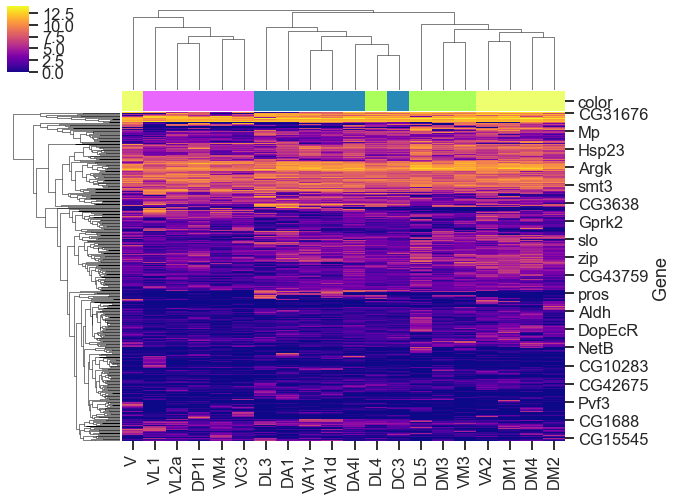

In [49]:
col_colors = df_lib_24h.loc[Z.columns]["color"]

cm = sns.clustermap(Z, method="weighted", cmap="plasma", figsize=(10,8), row_cluster=True, col_cluster=True,col_colors=col_colors)

plt.setp(cm.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

cm.ax_heatmap.set_ylabel("Gene")

